# Basic Example

In [1]:
import awkward as ak
import numpy as np
import hist
import json
from importlib import resources
import matplotlib.pyplot as plt
import mplhep as hep
from cycler import cycler
from datetime import date

In [2]:
acab_palette = ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#717581", "#92dadd"]
#hep.styles.cms.CMS["axes.prop_cycle"] # = cycler("color", acab_palette[::-1])
hep.style.use("CMS")

In [3]:
# Get the current date
current_date = date.today()
# Format the date
formatted_date = current_date.strftime("%y%m%d")


In [14]:
MULTICLASS = True
SPLIT = True

processes = [
    "bH_5FS_FXFX_M125_2017_b",
    "bH_5FS_FXFX_M125_2017_c",
    "bH_5FS_FXFX_M125_2017_l",
    "cH_4FS_FXFX_M125_2017_b",
    "cH_4FS_FXFX_M125_2017_c",
    "cH_4FS_FXFX_M125_2017_l",
    "ggh_M125_2017_b",
    "ggh_M125_2017_c",
    "ggh_M125_2017_l",
    "tth_M125_2017_b",
    "tth_M125_2017_c",
    "tth_M125_2017_l",
    "vbf_M125_2017_b",
    "vbf_M125_2017_c",
    "vbf_M125_2017_l",
    "vh_M125_2017_b",
    "vh_M125_2017_c",
    "vh_M125_2017_l",
    "THQ_HToGG_2017_b",
    "THQ_HToGG_2017_c",
    "THQ_HToGG_2017_l",
    "THW_HToGG_2017_b",
    "THW_HToGG_2017_c",
    "THW_HToGG_2017_l",
]

if not MULTICLASS:
    ext = f"{formatted_date}_bdt_single_class_CvsL_ordering"
    cats = [
        "bTag_high",
        "bTag_low",
        "cTag_high",
        "cTag_low",
        "lbTag_high",
        "lbTag_low",
        "lcTag_high",
        "lcTag_low"
    ]
else:
    ext = f"{formatted_date}_bdt_multiclass_CvsL_ordering_SM_cats"
    cats = [
        "bTag_high",
        "bTag_low",
        "cTag_high",
        "cTag_low",
        "tthTag",
        "vhTag",
        "vbfTag",
        "lTag_high",
        "lTag_low"
    ]

In [15]:
fileset = {}
fileset_data = {}

for i, proc in enumerate(processes):
    fileset[proc] = {}
    # input_dir = f"/pnfs/psi.ch/cms/trivcat/store/user/bevila_t/test2/phys/xpluscharm/HiggsDNA_output/HpC_signals_split_2017_240916/merged/{proc}/nominal" # this is pt ordered 
    # input_dir = f"/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/master_240821/higgs-dna-tiziano-bevilacqua/output/output_HpC_PNet_ordered_sig_241008_split/merged/{proc}/nominal" # this is CvsL ordered
    # input_dir = f"/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/master_240821/higgs-dna-tiziano-bevilacqua/output/HpC_signal_multiclass_241024_split/merged/{proc}/nominal" # this is CvsL ordered with multiclass bdt
    # input_dir = f"/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/master_240821/higgs-dna-tiziano-bevilacqua/output/higgs_dna_HpC_signal_samples_241031_split/merged/{proc}/nominal" # this is CvsL ordered with multiclass bdt
    #input_dir = f"/pnfs/psi.ch/cms/trivcat/store/user/bevila_t/test2/phys/xpluscharm/HiggsDNA_output/higgs_dna_HpC_signal_samples_multiclass_fixed_variables_241111_split/merged/{proc}/nominal" # this is CvsL ordered with multiclass bdt
    input_dir = f"/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/master_240821/higgs-dna-tiziano-bevilacqua/output/HpC_CQR_fit_2017_split/merged/{proc}/nominal" # this is CvsL ordered with multiclass bdt new PN wps and CQR
    # input_dir = f"/pnfs/psi.ch/cms/trivcat/store/user/bevila_t/test2/phys/xpluscharm/HiggsDNA_output/higgs_dna_HpC_signal_samples_multiclass_fixed_variables_241111/merged/{proc}/" # this is CvsL ordered with multiclass bdt
    for cat in cats:
        fileset[proc][cat] = ak.from_parquet(f"{input_dir}/{cat}_merged.parquet")
        fileset_data[cat] = ak.from_parquet(f"{input_dir}/{cat}_merged.parquet")

#input_dir = "/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/master_240821/higgs-dna-tiziano-bevilacqua/output/output_HpC_PNet_ordered_data_241008/merged/Data_2017"
# input_dir = "/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/master_240821/higgs-dna-tiziano-bevilacqua/output/HpC_data_multiclass_241024/merged/Data_2017"
input_dir = "/pnfs/psi.ch/cms/trivcat/store/user/bevila_t/test2/phys/xpluscharm/HiggsDNA_output/higgs_dna_Data_2017_multiclass_241031/merged/Data_2017"
#for cat in cats:
#    fileset_data[cat] = ak.from_parquet(f"{input_dir}/allData_{cat}_merged.parquet")


In [16]:
lumi = {
    "2016" : 35.9,
    "2017" : 41.5,
    "2018" : 59.2
}

norm_1fb = {
    "ggh": 48.58 * 0.00227 * 1000,
    "tth": 0.5071 * 0.00227 * 1000,
    "thw": 0.01517 * 0.00227 * 1000,
    "thq": 0.07425 * 0.00227 * 1000,
    "vbf": 3.782 * 0.00227 * 1000,
    "vh": 2.2555 * 0.00227 * 1000,
    "bh": 0.6654 * 0.00227 * 1000,
    "ch": 0.09013 * 0.00227 * 1000,
}

In [17]:
for f in fileset[[*processes][0]][[*cats][0]].fields:
    if "eight" not in f:
        print(f)

bdt_score
dZ
CMS_hgg_mass
event
pt
eta
phi
dijet_pt
dijet_eta
dijet_phi
dijet_mass
LeadPhoton_pt_mgg
LeadPhoton_eta
LeadPhoton_mvaID
SubleadPhoton_pt_mgg
SubleadPhoton_eta
SubleadPhoton_mvaID
LeadPhoton_pt
SubleadPhoton_pt
LeadPhoton_energy
SubleadPhoton_energy
Diphoton_cos_dPhi
sigmaMrv
sigmaMwv
PV_score
nPV
nPU
rho
n_jets
n_b_jets_loose
n_b_jets_medium
first_jet_pt
first_jet_eta
first_jet_phi
first_jet_mass
first_jet_hFlav
first_jet_DeepFlavour_CvsL
first_jet_DeepFlavour_CvsB
first_jet_DeepFlavour_B
first_jet_DeepFlavour_QG
first_jet_particleNetAK4_CvsL
first_jet_particleNetAK4_CvsB
first_jet_particleNetAK4_QvsG
first_jet_particleNetAK4_B
first_jet_jet_pn_b
first_jet_jet_pn_c
first_jet_jet_pn_uds
first_jet_jet_pn_g
first_jet_jet_pn_b_plus_c
first_jet_jet_pn_b_vs_c
first_jet_n_sv
first_jet_n_muons
first_jet_n_electrons
first_pt_jet_pt
first_pt_jet_eta
first_pt_jet_phi
first_pt_jet_mass
first_pt_jet_hFlav
first_pt_jet_DeepFlavour_CvsL
first_pt_jet_DeepFlavour_CvsB
first_pt_jet_DeepFlav

In [18]:
yields = {}
yields_proc = {
    "ggh": {},
    "ggh_c": {},
    "ggh_b": {},
    "ggh_l": {},
    "tth": {},
    "vbf": {},
    "vh": {},
    "bh": {},
    "ch": {},
    "thq": {},
    "thw": {},
}

yields_cats = {}
for c in cats:
    yields_cats[c] = 0.


for sample in yields_proc:
    if sample == "ggh":
        for flav in ["c", "b", "l"]:
            yields_proc[f"{sample}_{flav}"]["tot"] = 0
    yields_proc[sample]["tot"] = 0
    for cat in cats:
        yields_proc[sample][cat] = 0
        if sample == "ggh":
            for flav in ["c", "b", "l"]:
                yields_proc[f"{sample}_{flav}"][cat] = 0
for sample in [*fileset]:
    print("-"*60)
    print("sample:", sample)
    yields[sample] = {}
    yields[sample]["tot"] = 0
    tot_num_ev = 0
    for cat in cats:
        if len(fileset[sample][cat].weight) and (ak.sum(fileset[sample][cat]["weight"]) > 0):
            fileset[sample][cat]["weight_norm"] = fileset[sample][cat].weight * norm_1fb[sample.split("_")[0].lower()] * lumi["2017"]
            fileset[sample][cat]["square_weight"] = fileset[sample][cat].weight_norm ** 2
            yields[sample][cat] = ak.sum(fileset[sample][cat]["weight_norm"])
            yields[sample]["tot"] += ak.sum(fileset[sample][cat]["weight_norm"])
            yields_proc[sample.split("_")[0].lower()][cat] += ak.sum(fileset[sample][cat]["weight_norm"])
            yields_proc[sample.split("_")[0].lower()]["tot"] += ak.sum(fileset[sample][cat]["weight_norm"])
            tot_num_ev += len(fileset[sample][cat]["weight_norm"])
            if "ggh" in sample and SPLIT:
                yields_proc[f"{sample.split('_')[0].lower()}_{sample.split('_')[3].lower()}"][cat] += ak.sum(fileset[sample][cat]["weight_norm"])
                yields_proc[f"{sample.split('_')[0].lower()}_{sample.split('_')[3].lower()}"]["tot"] += ak.sum(fileset[sample][cat]["weight_norm"])
            yields_cats[cat] += ak.sum(fileset[sample][cat]["weight_norm"])
            print("   - cat:", cat, "events", yields[sample][cat])
            print("   - cat:", "tot", "events", yields[sample]["tot"])
            print("   - cat:", "num", "events", tot_num_ev)
        else:
            fileset[sample][cat]["weight_norm"] = 0
            fileset[sample][cat]["square_weight"] = 0
            yields[sample][cat] = 0
            print("   - cat:", cat, "events", 0), 

------------------------------------------------------------
sample: bH_5FS_FXFX_M125_2017_b
   - cat: bTag_high events 2.218030449109182
   - cat: tot events 2.218030449109182
   - cat: num events 166871
   - cat: bTag_low events 0.8310619856338055
   - cat: tot events 3.0490924347429873
   - cat: num events 211220
   - cat: cTag_high events 0.42492911897997737
   - cat: tot events 3.474021553722965
   - cat: num events 240938
   - cat: cTag_low events 0.22189826124024786
   - cat: tot events 3.695919814963213
   - cat: num events 253998
   - cat: tthTag events 0.010274646317191773
   - cat: tot events 3.7061944612804045
   - cat: num events 254342
   - cat: vhTag events 0.00047737739709759213
   - cat: tot events 3.706671838677502
   - cat: num events 254359
   - cat: vbfTag events 0.013224183759747751
   - cat: tot events 3.7198960224372497
   - cat: num events 254866
   - cat: lTag_high events 0.8715449779611598
   - cat: tot events 4.59144100039841
   - cat: num events 301573
   -

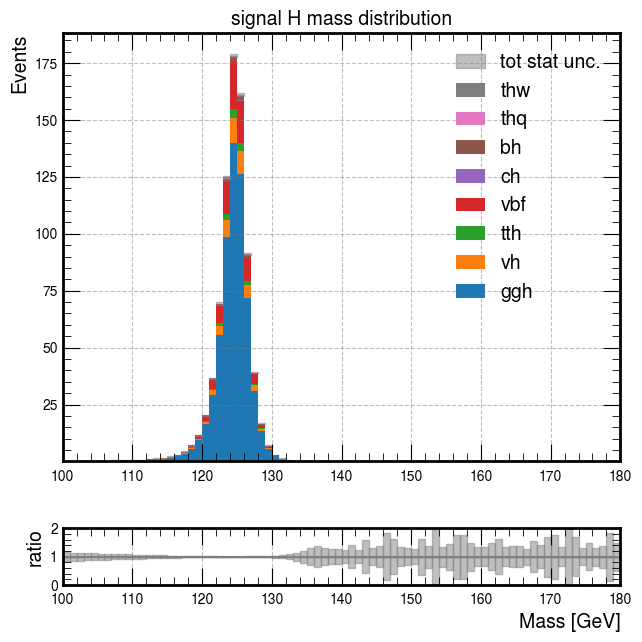

In [19]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

title = "signal H mass distribution"
var = "CMS_hgg_mass"
min_ = 100.
max_ = 180
nbins = 80

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["thw", "thq", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

for sample in [*fileset]:
    for cat in cats:
        if len(fileset[sample][cat].weight) > 1:
            full_hist.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["weight_norm"], c=sample.split("_")[0].lower())
            full_hist_err.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["square_weight"], c=sample.split("_")[0].lower())
            tot_hist.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["weight_norm"], c="tot")
            tot_hist_err.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["square_weight"], c="tot")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}


# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = acab_palette
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()

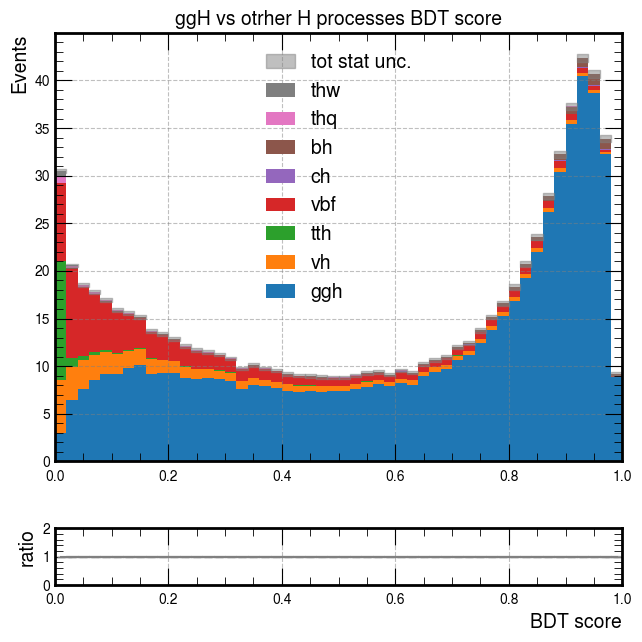

In [20]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

title = "ggH vs otrher H processes BDT score"
if not MULTICLASS:
    var = "ggh_vs_hb_bdt_score"
else:
    var = "ggh_vs_hb_bdt_sig_score"
min_ = 0.
max_ = 1
nbins = 50


LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["thw", "thq", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

for sample in [*fileset]:
    for cat in cats:
        if len(fileset[sample][cat].weight) > 1:
            full_hist.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["weight_norm"], c=sample.split("_")[0].lower())
            full_hist_err.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["square_weight"], c=sample.split("_")[0].lower())
            tot_hist.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["weight_norm"], c="tot")
            tot_hist_err.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["square_weight"], c="tot")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}


# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = acab_palette
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('BDT score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()

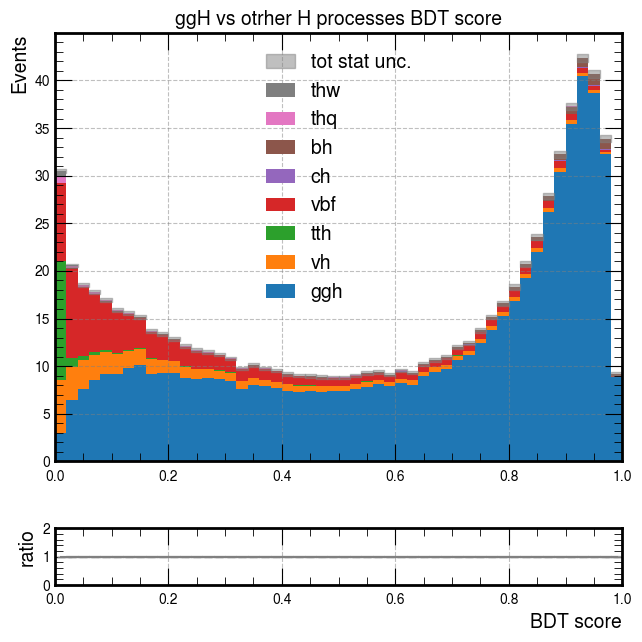

In [21]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

title = "ggH vs otrher H processes BDT score"
if not MULTICLASS:
    var = "ggh_vs_hb_bdt_score"
else:
    var = "ggh_vs_hb_bdt_sig_score"
min_ = 0.
max_ = 1
nbins = 50


LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["thw", "thq", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

for sample in [*fileset]:
    for cat in cats:
        if len(fileset[sample][cat].weight) > 1:
            filter = (
                fileset[sample][cat]["bdt_score"] > 0.8
            )
            full_hist.fill(ax = fileset[sample][cat][var][filter], weight = fileset[sample][cat]["weight_norm"][filter], c=sample.split("_")[0].lower())
            full_hist_err.fill(ax = fileset[sample][cat][var][filter], weight = fileset[sample][cat]["square_weight"][filter], c=sample.split("_")[0].lower())
            tot_hist.fill(ax = fileset[sample][cat][var][filter], weight = fileset[sample][cat]["weight_norm"][filter], c="tot")
            tot_hist_err.fill(ax = fileset[sample][cat][var][filter], weight = fileset[sample][cat]["square_weight"][filter], c="tot")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}


# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = acab_palette
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('BDT score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()

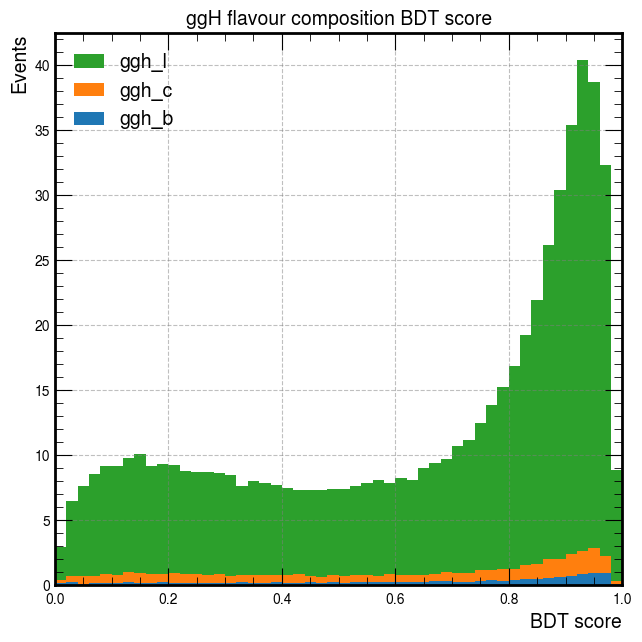

In [22]:
# lead photon eta
fig, ax0 = plt.subplots(1,1, figsize=(7, 7))

title = "ggH flavour composition BDT score"
if not MULTICLASS:
    var = "ggh_vs_hb_bdt_score"
else:
    var = "ggh_vs_hb_bdt_sig_score"
min_ = 0.
max_ = 1
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["ggh"], name="c")
LeadPhoton_et_cax_flav = hist.axis.StrCategory(["ggh_l", "ggh_c", "ggh_b"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_flav = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_flav)
full_hist_flav_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_flav)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

for sample in [*fileset]:
    for cat in cats:
        if len(fileset[sample][cat].weight) > 1:
            full_hist.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["weight_norm"], c=sample.split("_")[0].lower())
            full_hist_err.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["square_weight"], c=sample.split("_")[0].lower())
            tot_hist.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["weight_norm"], c="tot")
            tot_hist_err.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["square_weight"], c="tot")
            if "ggh" in sample:
                if "_l" in sample:
                    lab = "ggh_l"
                elif "_c" in sample:
                    lab = "ggh_c"
                else:
                    lab = "ggh_b"
                full_hist_flav.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["weight_norm"], c=lab)
                full_hist_flav_err.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["square_weight"], c=lab)
            else:
                full_hist_flav.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["weight_norm"], c="other")
                full_hist_flav_err.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["square_weight"], c="other")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")
h_stack_flav = full_hist_flav.stack("c")
h_stack_err_flav = full_hist_flav_err.stack("c")

stack = True
#h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
h_stack_flav[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}


# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()


ax0.set_xlim([min_, max_])
ax0.set_xlabel('BDT score', fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()

In [23]:
yields_proc

{'ggh': {'tot': 619.6336895428068,
  'bTag_high': 10.840305088137786,
  'bTag_low': 9.596382463348448,
  'cTag_high': 11.005036381872937,
  'cTag_low': 15.624643624073054,
  'tthTag': 0.31525837353469205,
  'vhTag': 0.062153213049370666,
  'vbfTag': 18.160335339380293,
  'lTag_high': 256.3990727889126,
  'lTag_low': 297.6305022704977},
 'ggh_c': {'tot': 37.39422027326195,
  'bTag_high': 0.9093680858359383,
  'bTag_low': 1.0737211631962011,
  'cTag_high': 3.170728583283653,
  'cTag_low': 6.978838703808801,
  'tthTag': 0.09105904884838352,
  'vhTag': 0.007396330776782182,
  'vbfTag': 0.9904451283481233,
  'lTag_high': 9.142771360550222,
  'lTag_low': 15.029891868613849},
 'ggh_b': {'tot': 14.672139631101263,
  'bTag_high': 4.1289900570239215,
  'bTag_low': 5.027945651449141,
  'cTag_high': 0.7622184216528274,
  'cTag_low': 1.2154750493462547,
  'tthTag': 0.16740207021191306,
  'vhTag': 0.002142941123067638,
  'vbfTag': 0.1743142282933999,
  'lTag_high': 1.3594056859840182,
  'lTag_low': 

In [24]:
51.37524360074871/(0.9362359629957252+0.6130220760036704+0.006119084895313631)

33.03073114004892

In [25]:
yields

{'bH_5FS_FXFX_M125_2017_b': {'tot': 5.025121141998536,
  'bTag_high': 2.218030449109182,
  'bTag_low': 0.8310619856338055,
  'cTag_high': 0.42492911897997737,
  'cTag_low': 0.22189826124024786,
  'tthTag': 0.010274646317191773,
  'vhTag': 0.00047737739709759213,
  'vbfTag': 0.013224183759747751,
  'lTag_high': 0.8715449779611598,
  'lTag_low': 0.4336801416001266},
 'bH_5FS_FXFX_M125_2017_c': {'tot': 0.21394982738994364,
  'bTag_high': 0.008547757804495265,
  'bTag_low': 0.003729966031492694,
  'cTag_high': 0.02178304938333902,
  'cTag_low': 0.013832612668627117,
  'tthTag': 0.0002554395760335237,
  'vhTag': 0,
  'vbfTag': 0.001243612810123999,
  'lTag_high': 0.11356842871035586,
  'lTag_low': 0.050988960405476146},
 'bH_5FS_FXFX_M125_2017_l': {'tot': 3.9346370914653326,
  'bTag_high': 0.08164360186500491,
  'bTag_low': 0.02154547078698504,
  'cTag_high': 0.08672141978132625,
  'cTag_low': 0.03741232149537864,
  'tthTag': 0.0011493575352756723,
  'vhTag': 0.00025183737886864884,
  'vbfT

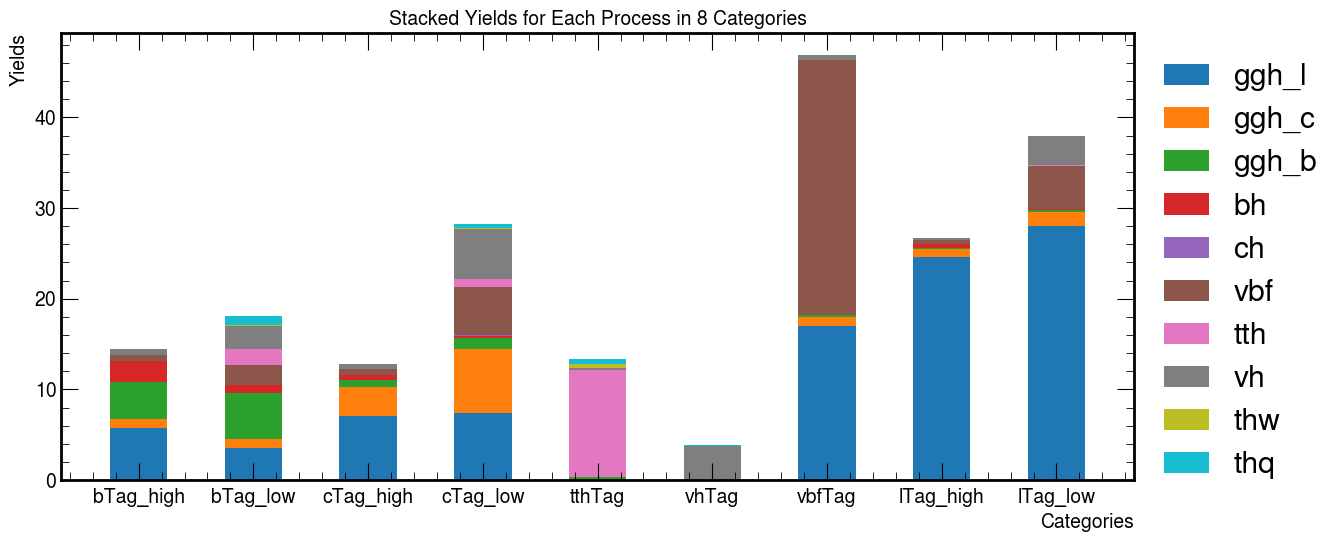

<Figure size 1000x1000 with 0 Axes>

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Number of categories, processes, and yields
n_categories = len([*cats])
n_processes = 6
n_yields = 3


# Category labels
categories = [*cats]
samples_ = ["ggh", "bh", "ch", "vbf", "tth", "vh", "thw", "thq"]

# X positions for the categories
x = np.arange(n_categories)

# Initialize the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Initialize the bottom values for each category (to stack yields)
bottoms = np.zeros(n_categories)
tot_categories = np.zeros(n_categories)

# Loop over the processes and create stacked bars for each category
for proc in samples_:
    # Stack the 3 yields for each process
    if proc == "ggh":
        for flavour in ["l", "c", "b"]:
            sum_ = []
            for cat in cats:
                if ("lT" in cat):
                    sum_.append(yields[f"{proc}_M125_2017_{flavour}"][cat]/10)
                else:
                    sum_.append(yields[f"{proc}_M125_2017_{flavour}"][cat])
            ax.bar(
                x,                      # Same x positions for all processes
                sum_,                    # Sum of yields for the current process
                width=0.5,               # Bar width for better visibility
                bottom=bottoms,          # Start from the accumulated yields
                label=f"{proc}_{flavour}"               # Label for each process
            )
            # Update bottoms for stacking
            bottoms += sum_
    else:
        sum_ = []
        for cat in cats:
            if ("lT" in cat):
                sum_.append(yields_proc[proc][cat]/10)
            else:
                sum_.append(yields_proc[proc][cat])
        ax.bar(
            x,                      # Same x positions for all processes
            sum_,                    # Sum of yields for the current process
            width=0.5,               # Bar width for better visibility
            bottom=bottoms,          # Start from the accumulated yields
            label=proc               # Label for each process
        )
        # Update bottoms for stacking
        bottoms += sum_

# Add category labels
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=14)

# Add labels and title
ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Yields', fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_title('Stacked Yields for Each Process in 8 Categories', fontsize=14)

# ax.set_yscale('log')

# Create a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()
plt.savefig(f"yields_{ext}.png")


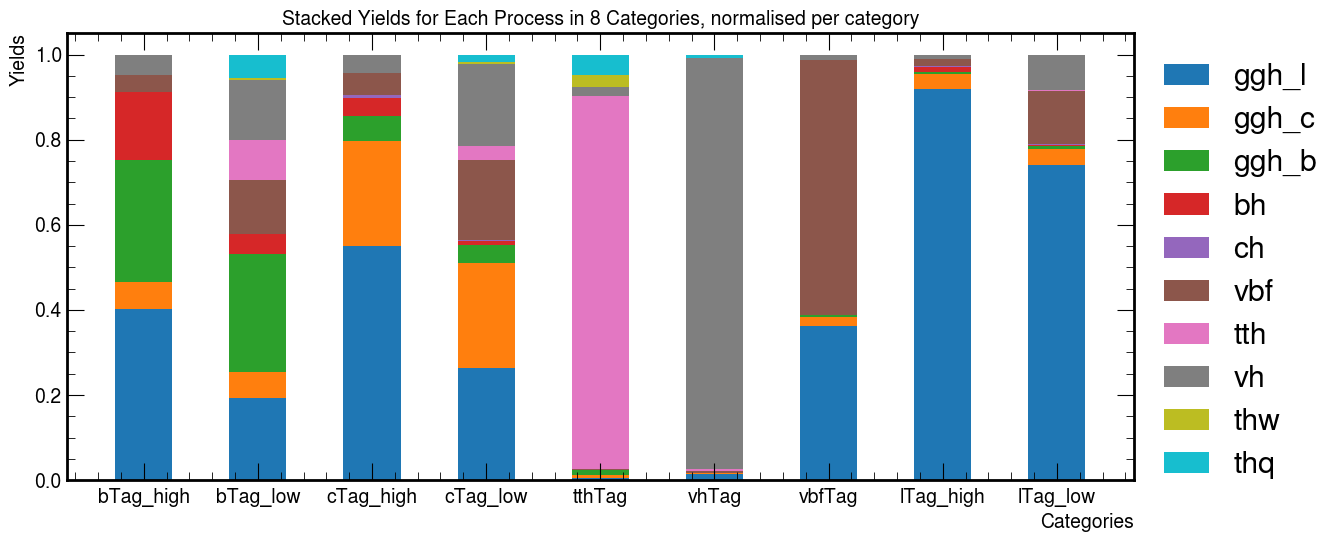

<Figure size 1000x1000 with 0 Axes>

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Number of categories, processes, and yields
n_categories = len([*cats])
n_processes = 6
n_yields = 3


# Category labels
categories = [*cats]
samples_ = ["ggh", "bh", "ch", "vbf", "tth", "vh", "thw", "thq"]

# X positions for the categories
x = np.arange(n_categories)

# Initialize the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Initialize the bottom values for each category (to stack yields)
bottoms = np.zeros(n_categories)
tot_categories = np.zeros(n_categories)

# Loop over the processes and create stacked bars for each category
for proc in samples_:
    # Stack the 3 yields for each process
    if proc == "ggh":
        for flavour in ["l", "c", "b"]:
            sum_ = []
            for cat in cats:
                sum_.append(yields[f"{proc}_M125_2017_{flavour}"][cat]/yields_cats[cat])
            ax.bar(
                x,                      # Same x positions for all processes
                sum_,                    # Sum of yields for the current process
                width=0.5,               # Bar width for better visibility
                bottom=bottoms,          # Start from the accumulated yields
                label=f"{proc}_{flavour}"               # Label for each process
            )
            # Update bottoms for stacking
            bottoms += sum_
    else:
        sum_ = []
        for cat in cats:
            sum_.append(yields_proc[proc][cat]/yields_cats[cat])
        ax.bar(
            x,                      # Same x positions for all processes
            sum_,                    # Sum of yields for the current process
            width=0.5,               # Bar width for better visibility
            bottom=bottoms,          # Start from the accumulated yields
            label=proc               # Label for each process
        )
        # Update bottoms for stacking
        bottoms += sum_

# Add category labels
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=14)

# Add labels and title
ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Yields', fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_title('Stacked Yields for Each Process in 8 Categories, normalised per category', fontsize=14)

# ax.set_yscale('log')

# Create a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()
plt.savefig(f"yields_norm_cats_{ext}.png")


[0 1 2 3 4 5 6 7 8]
[-0.417, 0.583, 1.58, 2.58, 3.58, 4.58, 5.58, 6.58, 7.58]


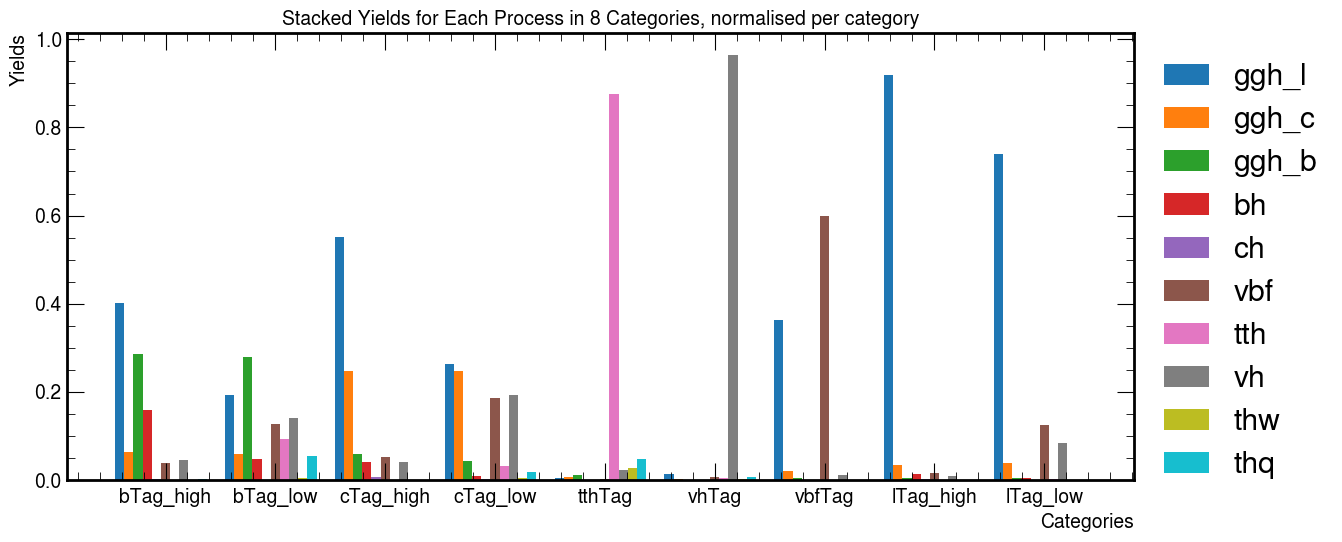

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Number of categories, processes, and yields
n_categories = len([*cats])
n_processes = 10
n_yields = 3


# Category labels
categories = [*cats]
samples_ = ["ggh", "bh", "ch", "vbf", "tth", "vh", "thw", "thq"]

# X positions for the categories
x = np.arange(n_categories)

# Initialize the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Initialize the bottom values for each category (to stack yields)
bottoms = np.zeros(n_categories)
tot_categories = np.zeros(n_categories)

i = 0
bar_width = 1 / (n_processes + 2)
x_ticks = np.arange(n_categories)
print (x)
x = x_ticks - ak.ones_like(x) * bar_width * int(n_processes / 2)
print (x)
# Loop over the processes and create stacked bars for each category
for proc in samples_:
    # Stack the 3 yields for each process
    if proc == "ggh":
        for flavour in ["l", "c", "b"]:
            sum_ = []
            for cat in cats:
                sum_.append(yields[f"{proc}_M125_2017_{flavour}"][cat]/yields_cats[cat])
            ax.bar(
                x + i * bar_width,             # Same x positions for all processes
                sum_,                          # Sum of yields for the current process
                width=bar_width,               # Bar width for better visibility
                label=f"{proc}_{flavour}"      # Label for each process
            )
            i += 1
    else:
        sum_ = []
        for cat in cats:
            sum_.append(yields_proc[proc][cat]/yields_cats[cat])
        ax.bar(
            x + i * bar_width,             # Same x positions for all processes
            sum_,                          # Sum of yields for the current process
            width=bar_width,               # Bar width for better visibility
            label=f"{proc}"                  # Label for each process
        )
        i += 1

# Add category labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(categories, fontsize=14)

# Add labels and title
ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Yields', fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_title('Stacked Yields for Each Process in 8 Categories, normalised per category', fontsize=14)

# ax.set_yscale('log')

# Create a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


[0 1 2 3 4 5 6 7 8]
[-0.417, 0.583, 1.58, 2.58, 3.58, 4.58, 5.58, 6.58, 7.58]


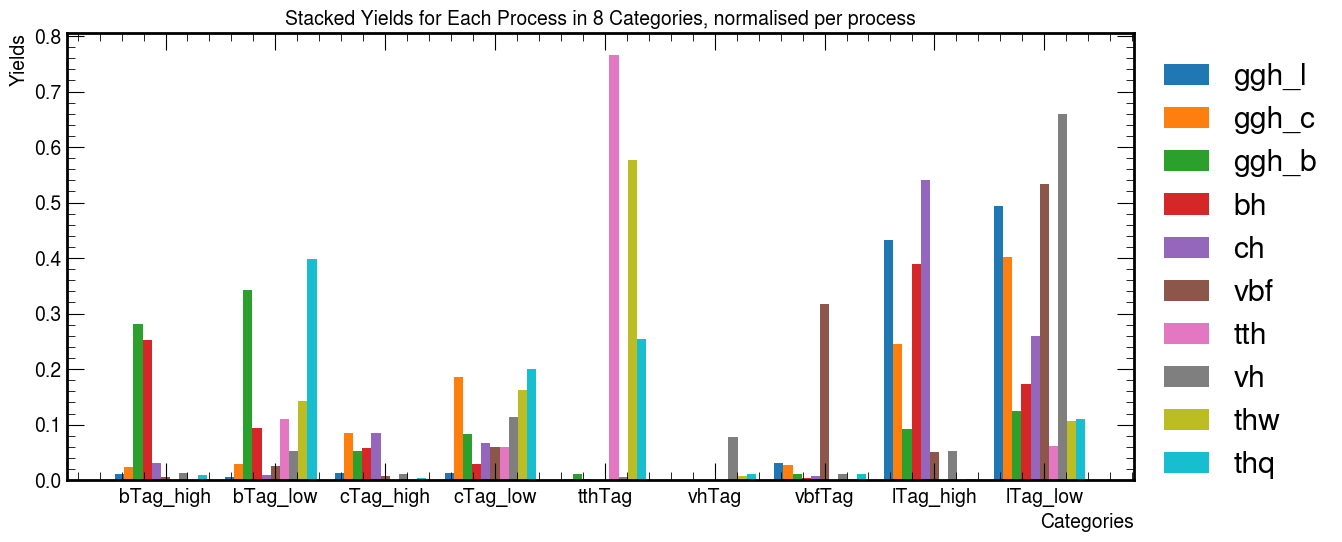

<Figure size 1000x1000 with 0 Axes>

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Number of categories, processes, and yields
n_categories = len([*cats])
n_processes = 10
n_yields = 3


# Category labels
categories = [*cats]
samples_ = ["ggh", "bh", "ch", "vbf", "tth", "vh", "thw", "thq"]

# X positions for the categories
x = np.arange(n_categories)

# Initialize the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Initialize the bottom values for each category (to stack yields)
bottoms = np.zeros(n_categories)
tot_categories = np.zeros(n_categories)

i = 0
bar_width = 1 / (n_processes + 2)
x_ticks = np.arange(n_categories)
print (x)
x = x_ticks - ak.ones_like(x) * bar_width * int(n_processes / 2)
print (x)
# Loop over the processes and create stacked bars for each category
for proc in samples_:
    # Stack the 3 yields for each process
    if proc == "ggh":
        for flavour in ["l", "c", "b"]:
            sum_ = []
            for cat in cats:
                sum_.append(yields[f"{proc}_M125_2017_{flavour}"][cat]/yields[f"{proc}_M125_2017_{flavour}"]["tot"])
            ax.bar(
                x + i * bar_width,             # Same x positions for all processes
                sum_,                          # Sum of yields for the current process
                width=bar_width,               # Bar width for better visibility
                label=f"{proc}_{flavour}"      # Label for each process
            )
            i += 1
    else:
        sum_ = []
        for cat in cats:
            sum_.append(yields_proc[proc][cat]/yields_proc[proc]["tot"])
        ax.bar(
            x + i * bar_width,             # Same x positions for all processes
            sum_,                          # Sum of yields for the current process
            width=bar_width,               # Bar width for better visibility
            label=f"{proc}"                  # Label for each process
        )
        i += 1

# Add category labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(categories, fontsize=14)

# Add labels and title
ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Yields', fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_title('Stacked Yields for Each Process in 8 Categories, normalised per process', fontsize=14)

# ax.set_yscale('log')

# Create a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()
plt.savefig(f"yields_norm_proc_{ext}.png")